In [3]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split


In [15]:
df = pd.read_csv("D:/Casualties0514.csv")

In [16]:
df

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2216715,2014984137714,1,1,2,2,16,4,3,0,0,2,0,0,9,1
2216716,2014984138414,1,1,1,1,27,6,3,0,0,0,0,0,9,1
2216717,2014984138414,2,2,1,1,44,7,2,0,0,0,0,0,19,1
2216718,2014984139614,1,2,2,1,61,9,3,0,0,0,4,0,11,2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216720 entries, 0 to 2216719
Data columns (total 15 columns):
 #   Column                              Dtype 
---  ------                              ----- 
 0   Accident_Index                      object
 1   Vehicle_Reference                   int64 
 2   Casualty_Reference                  int64 
 3   Casualty_Class                      int64 
 4   Sex_of_Casualty                     int64 
 5   Age_of_Casualty                     int64 
 6   Age_Band_of_Casualty                int64 
 7   Casualty_Severity                   int64 
 8   Pedestrian_Location                 int64 
 9   Pedestrian_Movement                 int64 
 10  Car_Passenger                       int64 
 11  Bus_or_Coach_Passenger              int64 
 12  Pedestrian_Road_Maintenance_Worker  int64 
 13  Casualty_Type                       int64 
 14  Casualty_Home_Area_Type             int64 
dtypes: int64(14), object(1)
memory usage: 253.7+ MB


In [18]:
df.describe

<bound method NDFrame.describe of         Accident_Index  Vehicle_Reference  Casualty_Reference  Casualty_Class  \
0        200501BS00001                  1                   1               3   
1        200501BS00002                  1                   1               2   
2        200501BS00003                  2                   1               1   
3        200501BS00004                  1                   1               3   
4        200501BS00005                  1                   1               1   
...                ...                ...                 ...             ...   
2216715  2014984137714                  1                   1               2   
2216716  2014984138414                  1                   1               1   
2216717  2014984138414                  2                   2               1   
2216718  2014984139614                  1                   2               2   
2216719  2014984139614                  2                   1              

In [19]:
df.isna().any().any()

False

In [21]:
df.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type'],
      dtype='object')

In [31]:
X= df.drop(["Accident_Index","Casualty_Severity"], axis=1)

In [45]:
df.corr()

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
Vehicle_Reference,1.000000,0.202186,-0.227000,0.024252,0.059017,0.070645,0.087790,-0.234376,-0.194355,0.043051,-0.033998,-0.022415,0.088101,0.023133
Casualty_Reference,0.202186,1.000000,0.114956,0.049757,-0.056126,-0.065867,0.025629,-0.083282,-0.064304,0.295995,0.172468,-0.009638,0.091084,-0.018960
Casualty_Class,-0.227000,0.114956,1.000000,0.129575,-0.130578,-0.185342,-0.065846,0.725238,0.608977,0.341756,0.114650,0.087605,-0.257666,-0.142111
Sex_of_Casualty,0.024252,0.049757,0.129575,1.000000,0.046686,0.037865,0.085344,-0.006003,-0.000463,0.154296,0.086781,-0.002426,0.039451,0.026576
Age_of_Casualty,0.059017,-0.056126,-0.130578,0.046686,1.000000,0.965141,-0.052586,-0.057087,-0.030784,-0.174309,0.055629,0.035599,0.088706,0.082681
Age_Band_of_Casualty,0.070645,-0.065867,-0.185342,0.037865,0.965141,1.000000,-0.045014,-0.088866,-0.055230,-0.200245,0.023641,0.033016,0.096454,0.098894
Casualty_Severity,0.087790,0.025629,-0.065846,0.085344,-0.052586,-0.045014,1.000000,-0.099319,-0.077810,0.055000,0.033028,-0.009664,0.079092,-0.007728
Pedestrian_Location,-0.234376,-0.083282,0.725238,-0.006003,-0.057087,-0.088866,-0.099319,1.000000,0.831796,-0.162092,-0.054377,0.095362,-0.356183,-0.084863
Pedestrian_Movement,-0.194355,-0.064304,0.608977,-0.000463,-0.030784,-0.055230,-0.077810,0.831796,1.000000,-0.136107,-0.045660,0.080128,-0.299084,-0.064677
Car_Passenger,0.043051,0.295995,0.341756,0.154296,-0.174309,-0.200245,0.055000,-0.162092,-0.136107,1.000000,-0.063783,-0.038295,0.118182,-0.058898


<AxesSubplot:>

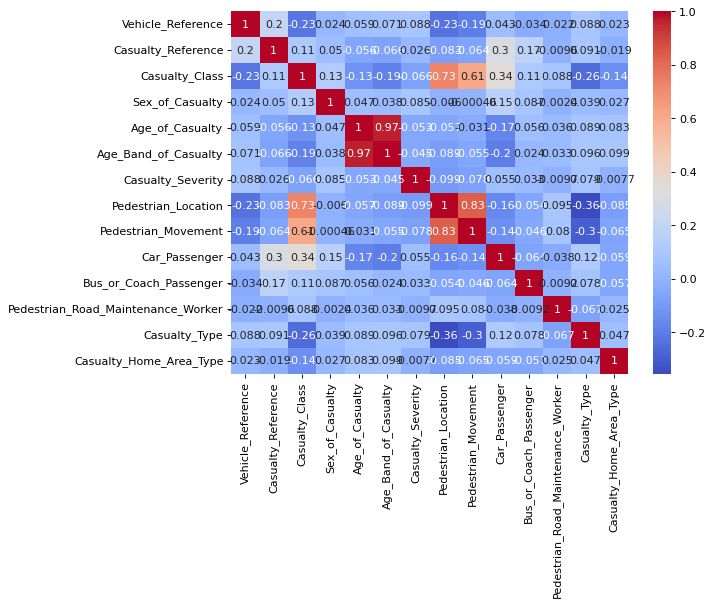

In [47]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [32]:
X

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,1,1,3,1,37,7,1,1,0,0,-1,0,1
1,1,1,2,1,37,7,0,0,0,4,-1,11,1
2,2,1,1,1,62,9,0,0,0,0,-1,9,1
3,1,1,3,1,30,6,5,2,0,0,-1,0,1
4,1,1,1,1,49,8,0,0,0,0,-1,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2216715,1,1,2,2,16,4,0,0,2,0,0,9,1
2216716,1,1,1,1,27,6,0,0,0,0,0,9,1
2216717,2,2,1,1,44,7,0,0,0,0,0,19,1
2216718,1,2,2,1,61,9,0,0,0,4,0,11,2


In [33]:
y = df['Casualty_Severity']

In [34]:
y

0          2
1          3
2          3
3          3
4          3
          ..
2216715    3
2216716    3
2216717    2
2216718    3
2216719    3
Name: Casualty_Severity, Length: 2216720, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [36]:
X_train

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
166837,1,1,1,1,20,4,0,0,0,0,-1,1,1
1781046,1,1,1,2,27,6,0,0,0,0,0,9,1
895066,1,1,1,1,24,5,0,0,0,0,-1,9,1
1286259,2,1,1,1,65,9,0,0,0,0,-1,1,2
881336,2,1,1,1,63,9,0,0,0,0,-1,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146745,2,5,2,2,11,3,0,0,2,0,0,9,1
2067872,1,3,2,1,33,6,0,0,1,0,0,9,1
983659,1,2,3,1,81,11,5,1,0,0,-1,0,-1
722996,3,1,2,2,19,4,0,0,2,0,-1,9,1


In [37]:
X_test

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
1890390,2,1,1,2,21,5,0,0,0,0,0,3,-1
1002563,2,1,2,2,25,5,0,0,0,3,-1,11,-1
153899,1,1,1,2,19,4,0,0,0,0,-1,9,1
600348,1,1,3,1,24,5,4,1,0,0,-1,0,1
1194217,2,1,2,2,34,6,0,0,1,0,-1,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
621018,1,1,1,2,25,5,0,0,0,0,-1,9,-1
61684,1,1,1,1,22,5,0,0,0,0,-1,9,1
1293153,1,2,2,2,50,8,0,0,2,0,-1,9,1
1878716,2,1,1,1,45,7,0,0,0,0,0,1,1


In [39]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB().fit(X_train, y_train)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = clf.predict(X_test)
print(classification_report(y_test, pred))
print()
print('Confusion matrix: \n', confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           1       0.03      0.05      0.04      7558
           2       0.20      0.20      0.20     82257
           3       0.89      0.89      0.89    641703

    accuracy                           0.80    731518
   macro avg       0.38      0.38      0.38    731518
weighted avg       0.80      0.80      0.80    731518


Confusion matrix: 
 [[   353   1343   5862]
 [  1797  16081  64379]
 [  8241  61070 572392]]


In [41]:
print('Accuracy: ', accuracy_score(y_test, pred))

Accuracy:  0.8049371307336252


In [42]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X_train, y_train)

In [43]:
pred_dt = tree.predict(X_test)
print(classification_report(y_test, pred_dt))
print()
print('Confusion matrix: \n', confusion_matrix(y_test, pred_dt))

              precision    recall  f1-score   support

           1       0.03      0.01      0.01      7558
           2       0.23      0.05      0.09     82257
           3       0.88      0.98      0.93    641703

    accuracy                           0.86    731518
   macro avg       0.38      0.35      0.34    731518
weighted avg       0.80      0.86      0.82    731518


Confusion matrix: 
 [[    58    558   6942]
 [   442   4378  77437]
 [  1420  14370 625913]]


In [44]:
print('Accuracy: ', accuracy_score(y_test, pred_dt))

Accuracy:  0.8616999171585662


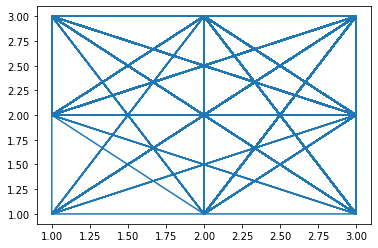

In [48]:
import matplotlib.pyplot as plt
plt.plot(y_test, pred_dt)
plt.show()

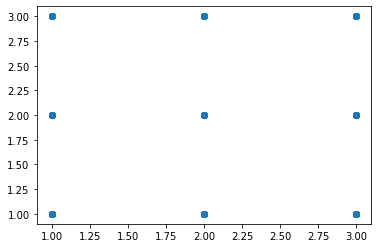

In [49]:
plt.scatter(y_test, pred_dt)
plt.show()